In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 49.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=045e2550ed9639ed59f43d8cf470ac4a6a37fb23c15c98a29be34fad302b9eec
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, FloatType
from pyspark.sql.window import Window
from pyspark.sql.functions import sum

In [ ]:
spark = SparkSession.builder.master('local').appName('leraning-df').config('spark.ui.port', '4050').getOrCreate()

In [ ]:
df = spark.read.format('csv').option('header','true').option('inferschema', 'true').option('delimiter', ',').load('/content/drive/MyDrive/datasets/jojostandstatsv2.csv')

A Stand (スタンド Sutando) is a visual manifestation of life energy.‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎

A Stand is an entity psychically generated by its owner, referred to as a Stand User (スタンド使い Sutando Tsukai).[1] It generally presents itself as a figure hovering over or near the user and possesses abilities beyond that of an ordinary human, which, depending on the Stand User, can be wielded for good or evil.

Stands abilities are divided into the following categories:

1 - Destructive Power (破壊力 Hakairyoku): Measures the Stand's strength and ability to cause destruction (physical injury or collateral environmental damage) in a given period of time.

2 - Speed (スピード Supīdo): Measures the Stand's agility and reflexes as well as performance speed.

3 - Range (射程距離 Shatei Kyori): Measures a compromise of the Stand's range of manifestation, range of ability influence, and spatial mobility.

4 - Power Persistence (持続力 Jizoku-ryoku): Measures the duration of time that the Stand can actively maintain its ability. It can also be used in the sense of the time it takes before a special ability can be activated again, such as Star Platinum: The World's time stop.

5 - Precision (精密動作性 Seimitsu Dōsa-sei): Measures the Stand's accuracy and range of influence/effect of their abilities to specified targets. Automatic type Stands are generally evaluated with Rank D or under with a few exceptions.

6 - Development Potential (成長性 Seichō-sei): Measures the Stand's possible functions, utilization of its abilities and powers, and capacity to improve its overall capabilities. It decreases in rank as the user masters their Stand.
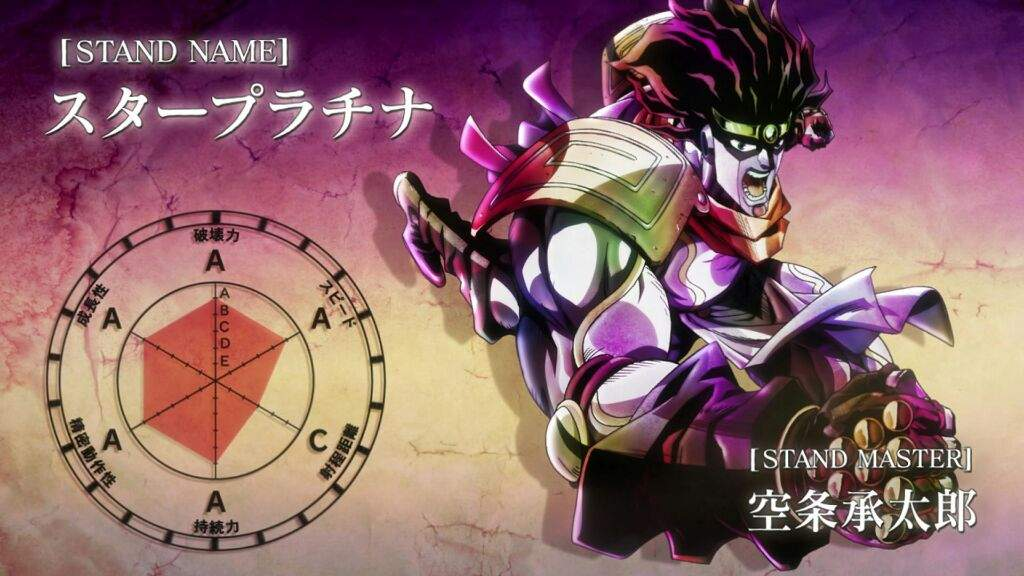


In [ ]:
df.show()
df.printSchema()

+--------------+---+---+---+---+---+---+
|         Stand|PWR|SPD|RNG|PER|PRC|DEV|
+--------------+---+---+---+---+---+---+
|        Anubis|  B|  B|  E|  A|  E|  C|
|          Atum|  D|  C|  D|  B|  D|  D|
|        Bastet|  E|  E|  B|  A|  E|  E|
|         Cream|  B|  B|  D|  C|  C|  D|
|Death Thirteen|  C|  C|  E|  B|  D|  B|
|           Geb|  C|  B|  A|  B|  D|  D|
|High Priestess|  C|  B|  A|  A|  D|  D|
|         Horus|  B|  B|  D|  C|  E|  C|
|     Judgement|  B|  B|  C|  B|  D|  D|
|         Khnum|  E|  E|  E|  A|  E|  E|
|        Osiris|  E|  D|  D|  C|  D|  D|
|        Sethan|  D|  D|  E|  C|  D|  D|
|    Tenore Sax|  E|  E|  D|  A|  E|  E|
|         Tohth|  E|  E|  E|  A|  E|  E|
|Dark Blue Moon|  C|  C|  C|  B|  C|  D|
|       Emperor|  B|  B|  B|  C|  E|  E|
|   Ebony Devil|  D|  D|  A|  B|  D|  B|
|       Empress|  C|  E|  A|  A|  D|  D|
|    Hanged Man|  C|  A|  A|  B|  D|  D|
| Hermit Purple|  D|  C|  D|  A|  D|  E|
+--------------+---+---+---+---+---+---+
only showing top

In [ ]:
print((df.count(), len(df.columns)))

(156, 7)


In [ ]:
df.select(F.col('Stand'), F.col('RNG')).filter(F.col('RNG') == 'A').show(38)

In [ ]:
#usando sql
df.createOrReplaceTempView('stands')

In [ ]:
spark.sql('SELECT * FROM stands').show()

+--------------+---+---+---+---+---+---+
|         Stand|PWR|SPD|RNG|PER|PRC|DEV|
+--------------+---+---+---+---+---+---+
|        Anubis|  B|  B|  E|  A|  E|  C|
|          Atum|  D|  C|  D|  B|  D|  D|
|        Bastet|  E|  E|  B|  A|  E|  E|
|         Cream|  B|  B|  D|  C|  C|  D|
|Death Thirteen|  C|  C|  E|  B|  D|  B|
|           Geb|  C|  B|  A|  B|  D|  D|
|High Priestess|  C|  B|  A|  A|  D|  D|
|         Horus|  B|  B|  D|  C|  E|  C|
|     Judgement|  B|  B|  C|  B|  D|  D|
|         Khnum|  E|  E|  E|  A|  E|  E|
|        Osiris|  E|  D|  D|  C|  D|  D|
|        Sethan|  D|  D|  E|  C|  D|  D|
|    Tenore Sax|  E|  E|  D|  A|  E|  E|
|         Tohth|  E|  E|  E|  A|  E|  E|
|Dark Blue Moon|  C|  C|  C|  B|  C|  D|
|       Emperor|  B|  B|  B|  C|  E|  E|
|   Ebony Devil|  D|  D|  A|  B|  D|  B|
|       Empress|  C|  E|  A|  A|  D|  D|
|    Hanged Man|  C|  A|  A|  B|  D|  D|
| Hermit Purple|  D|  C|  D|  A|  D|  E|
+--------------+---+---+---+---+---+---+
only showing top

In [ ]:
spark.sql('SELECT Stand, RNG FROM stands WHERE RNG == "A"').show()

+--------------------+---+
|               Stand|RNG|
+--------------------+---+
|                 Geb|  A|
|      High Priestess|  A|
|         Ebony Devil|  A|
|             Empress|  A|
|          Hanged Man|  A|
|    Hierophant Green|  A|
|             Justice|  A|
|              Lovers|  A|
|                 Sun|  A|
|       Tower of Gray|  A|
|       Aqua Necklace|  A|
|             Harvest|  A|
|        Highway Star|  A|
|  Sheer Heart Attack|  A|
|      Bites the Dust|  A|
|Red Hot Chili Pepper|  A|
|            The Lock|  A|
|       Black Sabbath|  A|
|           Baby Face|  A|
|         Moody Blues|  A|
+--------------------+---+
only showing top 20 rows



In [ ]:
spark.sql('SELECT Stand, PWR, RNG FROM stands WHERE RNG == "A" AND PWR == "A"').show()

+--------------------+---+---+
|               Stand|PWR|RNG|
+--------------------+---+---+
|  Sheer Heart Attack|  A|  A|
|Red Hot Chili Pepper|  A|  A|
|       Black Sabbath|  A|  A|
|           Baby Face|  A|  A|
|    Baby Face�(GoGo)|  A|  A|
|           Green Day|  A|  A|
|                Kiss|  A|  A|
|        Planet Waves|  A|  A|
|           Tusk ACT4|  A|  A|
+--------------------+---+---+



In [ ]:
spark.sql("SELECT * FROM stands WHERE Stand LIKE '%Gold%'").show(truncate=False)

+-----------------------+----+----+----+----+----+----+
|Stand                  |PWR |SPD |RNG |PER |PRC |DEV |
+-----------------------+----+----+----+----+----+----+
|Gold Experience        |C   |A   |C   |D   |C   |A   |
|Gold Experience Requiem|Infi|Infi|Infi|Infi|Infi|Infi|
+-----------------------+----+----+----+----+----+----+



In [ ]:
spark.sql("SELECT * FROM stands WHERE Stand LIKE '%Gold%' AND PWR == 'Infi'").show(truncate=False)

+-----------------------+----+----+----+----+----+----+
|Stand                  |PWR |SPD |RNG |PER |PRC |DEV |
+-----------------------+----+----+----+----+----+----+
|Gold Experience Requiem|Infi|Infi|Infi|Infi|Infi|Infi|
+-----------------------+----+----+----+----+----+----+



In [ ]:
spark.sql("SELECT * FROM stands WHERE Stand LIKE '%Star%'").show(truncate=False)

+------------------------+---+---+---+---+---+----+
|Stand                   |PWR|SPD|RNG|PER|PRC|DEV |
+------------------------+---+---+---+---+---+----+
|Star Platinum           |A  |A  |C  |A  |A  |A   |
|Highway Star            |C  |B  |A  |A  |E  |C   |
|Star Platinum: The World|A  |A  |C  |E  |A  |C   |
|Star Platinum           |A  |A  |C  |A  |A  |None|
|Cream Starter           |D  |C  |C  |A  |E  |B   |
+------------------------+---+---+---+---+---+----+



In [ ]:
spark.sql("SELECT * FROM stands WHERE Stand LIKE 'Star%'").show(truncate=False)

+------------------------+---+---+---+---+---+----+
|Stand                   |PWR|SPD|RNG|PER|PRC|DEV |
+------------------------+---+---+---+---+---+----+
|Star Platinum           |A  |A  |C  |A  |A  |A   |
|Star Platinum: The World|A  |A  |C  |E  |A  |C   |
|Star Platinum           |A  |A  |C  |A  |A  |None|
+------------------------+---+---+---+---+---+----+



In [ ]:
spark.sql('SELECT Stand FROM stands ORDER BY Stand DESC').show()

+--------------------+
|               Stand|
+--------------------+
|            Yo-Yo Ma|
|   Yellow Temperance|
|               Wired|
|          Whitesnake|
|         White Album|
|    Wheel of Fortune|
|      Weather Report|
|        Voodoo Child|
|         Under World|
|           Tusk ACT4|
|           Tusk ACT3|
|           Tusk ACT2|
|           Tusk ACT1|
|       Tubular Bells|
|       Tower of Gray|
|Tomb of the Boom ...|
|               Tohth|
|      Ticket to Ride|
|           The World|
|            The Lock|
+--------------------+
only showing top 20 rows



In [ ]:
spark.sql('SELECT * FROM stands ORDER BY PWR DESC').show(truncate=False)

+--------------------------+----+----+----+----+----+----+
|Stand                     |PWR |SPD |RNG |PER |PRC |DEV |
+--------------------------+----+----+----+----+----+----+
|C-Moon                    |None|B   |B   |B   |A   |D   |
|Civil War                 |None|C   |C   |B   |C   |None|
|Sky High                  |None|None|B   |C   |None|None|
|Bohemian Rhapsody         |None|None|Infi|A   |None|None|
|Burning Down the House    |None|None|None|None|None|None|
|Rolling Stones            |None|B   |A   |A   |E   |None|
|Limp Bizkit               |None|B   |B   |A   |C   |E   |
|20th Century Boy          |None|C   |None|A   |D   |C   |
|Chocolate Disco           |None|C   |C   |B   |A   |D   |
|Mandom                    |None|A   |None|E   |None|C   |
|Tatoo You!                |None|E   |C   |B   |E   |E   |
|California King Bed       |None|None|E   |B   |E   |E   |
|Paisley Park              |None|None|A   |A   |D   |C   |
|Dragon's Dream            |None|None|None|A   |None|Non

In [ ]:
spark.sql('SELECT * FROM stands ORDER BY PWR').show()

+--------------------+---+----+----+----+---+----+
|               Stand|PWR| SPD| RNG| PER|PRC| DEV|
+--------------------+---+----+----+----+---+----+
|  Sheer Heart Attack|  A|   C|   A|   A|  E|   A|
|       Star Platinum|  A|   A|   C|   A|  A|   A|
|           The World|  A|   A|   C|   A|  B|   B|
|       Crazy Diamond|  A|   A|   D|   B|  B|   C|
|        Killer Queen|  A|   B|   D|   B|  B|   A|
|               Oasis|  A|   A|   B|   A|  E|   C|
|Red Hot Chili Pepper|  A|   A|   A|   A|  C|   A|
|Star Platinum: Th...|  A|   A|   C|   E|  A|   C|
|       Black Sabbath|  A|   A|   A|   A|  E|   E|
|           Baby Face|  A|   B|   A|   A|  E|   A|
|      Sticky Fingers|  A|   A|   C|   D|  C|   D|
|         Purple Haze|  A|   B|   C|   E|  E|   B|
|    Baby Face�(GoGo)|  A|   B|   A|   A|  C|   C|
|       Echoes (ACT3)|  A|   C|   D|   C|  C|   B|
|           Green Day|  A|   C|   A|   A|  E|   A|
|        King Crimson|  A|   A|   E|   E|  B|Infi|
|          Kraft Work|  A|   A|

In [ ]:
spark.sql("SELECT * FROM stands WHERE Stand LIKE '%Tusk%'").show(truncate=False)

+---------+---+---+---+---+---+---+
|Stand    |PWR|SPD|RNG|PER|PRC|DEV|
+---------+---+---+---+---+---+---+
|Tusk ACT1|E  |E  |D  |B  |E  |A  |
|Tusk ACT2|D  |D  |B  |C  |C  |A  |
|Tusk ACT3|D  |D  |B  |D  |C  |A  |
|Tusk ACT4|A  |B  |A  |A  |B  |E  |
+---------+---+---+---+---+---+---+



In [ ]:
spark.sql("SELECT Stand, PWR, SPD FROM stands WHERE Stand LIKE '%Tusk%'").show(truncate=False)

+---------+---+---+
|Stand    |PWR|SPD|
+---------+---+---+
|Tusk ACT1|E  |E  |
|Tusk ACT2|D  |D  |
|Tusk ACT3|D  |D  |
|Tusk ACT4|A  |B  |
+---------+---+---+



In [72]:
spark.sql("SELECT Stand, PWR, SPD FROM stands WHERE Stand LIKE '%Echoes%'").show(truncate=False)

+-------------+---+---+
|Stand        |PWR|SPD|
+-------------+---+---+
|Echoes (ACT1)|E  |E  |
|Echoes (ACT2)|C  |D  |
|Echoes (ACT3)|B  |B  |
|Echoes (ACT3)|A  |C  |
+-------------+---+---+

